# Li-ion Battery Aging Datasets (NASA): as an RUL problem

In this notebook, we use the (minimally) processed labeled dataset exported from the previous notebook and train a few baseline ML models. The training set contains batteries `['B0005', 'B0006']`, and the evaluation set contains battery `'B0007'`. The test set is `'B0018'`. Note that, to be simple, we will not do further feature engineering (including lag features because the time steps are not evenly spaced).

We evaluate model performances by RMSE.

1. Load labeled data sets
2. Train ML models and evaluate models


Reference:
B. Saha and K. Goebel (2007). "Battery Data Set", NASA Prognostics Data Repository, NASA Ames Research Center, Moffett Field, CA

```
Author: Cedric Yu
Last modified: 20230105
```

In [30]:
# Load the "autoreload" extension so that code can change
import os
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import lightgbm as lgb
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

%load_ext autoreload
# Always reload modules so that as you change code in src, it gets loaded
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load processed battery data

In [13]:
dfs = {}
battery_names = ['B0005', 'B0006', 'B0007', 'B0018']
for battery in battery_names:
    df_ = pd.read_csv(f'./{battery}_RUL.csv')
    df_ = df_.drop(['type'], axis=1)
    dfs[battery] = df_


In [48]:
battery_names_train = ['B0005', 'B0006']
battery_names_eval = ['B0007']
battery_names_test = ['B0018']


In [49]:
data_train = [dfs[battery] for battery in battery_names_train]
X_train = [df.drop(['time', 'RUL'], axis=1) for df in data_train]
y_train = [df['RUL'] for df in data_train]
X_train_ = pd.concat(X_train)
X_train_.reset_index(inplace=True, drop=True)
y_train_ = pd.concat(y_train)
y_train_ = y_train_.reset_index(drop=True)
data_eval = [dfs[battery] for battery in battery_names_eval]
X_eval = [df.drop(['time', 'RUL'], axis=1) for df in data_eval]
y_eval = [df['RUL'] for df in data_eval]
X_eval_ = pd.concat(X_eval)
X_eval_.reset_index(inplace=True, drop=True)
y_eval_ = pd.concat(y_eval)
y_eval_ = y_eval_.reset_index(drop=True)
data_test = [dfs[battery] for battery in battery_names_test]
X_test = [df.drop(['time', 'RUL'], axis=1) for df in data_test]
y_test = [df['RUL'] for df in data_test]
X_test_ = pd.concat(X_test)
X_test_.reset_index(inplace=True, drop=True)
y_test_ = pd.concat(y_test)
y_test_ = y_test_.reset_index(drop=True)


### XGBoost

In [47]:
xgb = XGBRegressor(eval_metric="rmse")


In [50]:
xgb.fit(X_train_, y_train_, eval_set = [(X_train_, y_train_), (X_eval_, y_eval_)])


[0]	validation_0-rmse:609702.79033	validation_1-rmse:613639.10364
[1]	validation_0-rmse:479067.76965	validation_1-rmse:474411.05966
[2]	validation_0-rmse:399356.55267	validation_1-rmse:404425.08575
[3]	validation_0-rmse:353240.96944	validation_1-rmse:367588.11514
[4]	validation_0-rmse:327632.16430	validation_1-rmse:345706.82969
[5]	validation_0-rmse:313722.19332	validation_1-rmse:338836.27265
[6]	validation_0-rmse:305039.68791	validation_1-rmse:340313.78474
[7]	validation_0-rmse:300830.37658	validation_1-rmse:342372.57486
[8]	validation_0-rmse:298018.82715	validation_1-rmse:344314.73320
[9]	validation_0-rmse:296836.29427	validation_1-rmse:352901.43914
[10]	validation_0-rmse:294748.23244	validation_1-rmse:356121.41767
[11]	validation_0-rmse:293767.68992	validation_1-rmse:357334.80590
[12]	validation_0-rmse:292427.89804	validation_1-rmse:359114.55885
[13]	validation_0-rmse:291842.94447	validation_1-rmse:360722.57814
[14]	validation_0-rmse:290637.97649	validation_1-rmse:362133.69517
[15]	

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [51]:
print(mean_squared_error(y_test_, xgb.predict(X_test_), squared = False))


369143.05585343024


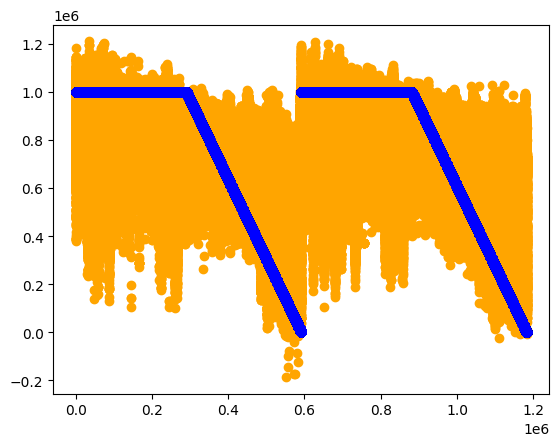

In [53]:
plt.figure()
plt.scatter(np.array(list(y_train_.index)), xgb.predict(X_train_), c='orange')
plt.scatter(np.array(list(y_train_.index)), np.array(list(y_train_.values)), c='blue')


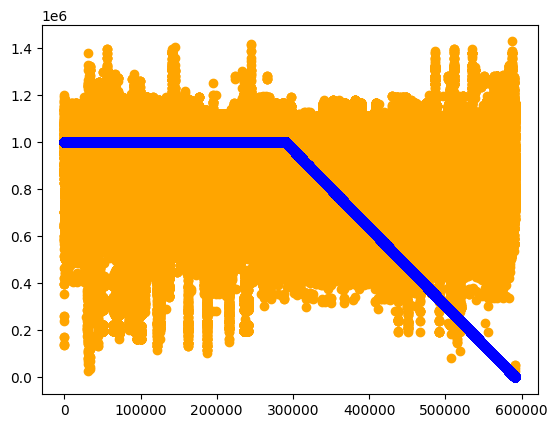

In [60]:
plt.figure()
plt.scatter(np.array(list(y_eval_.index)), xgb.predict(X_eval_), c='orange')
plt.scatter(np.array(list(y_eval_.index)), np.array(list(y_eval_.values)), c='blue')


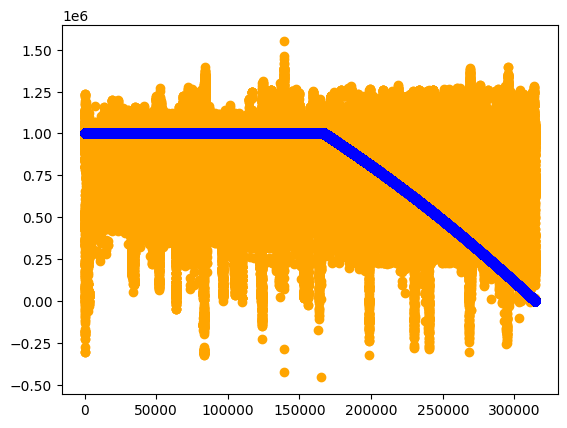

In [52]:
plt.figure()
plt.scatter(np.array(list(y_test_.index)), xgb.predict(X_test_), c='orange')
plt.scatter(np.array(list(y_test_.index)), np.array(list(y_test_.values)), c='blue')


### lgbm

In [ ]:
LGBMreg = lgb.LGBMRegressor()
LGBMreg.fit(X_train_, y_train_, eval_set = [(X_train_, y_train_), (X_eval_, y_eval_)], eval_metric="rmse")


In [56]:
print(mean_squared_error(y_test_, LGBMreg.predict(X_test_), squared = False))


354354.7730387725


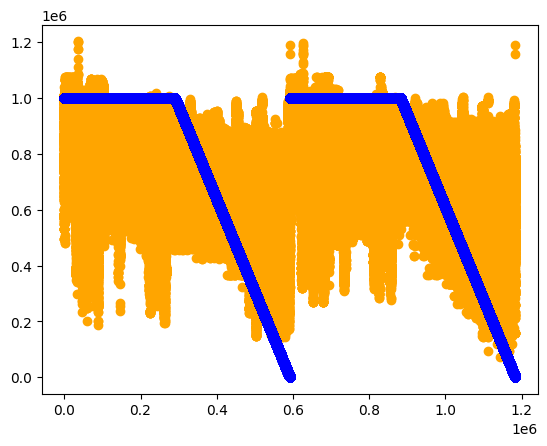

In [57]:
plt.figure()
plt.scatter(np.array(list(y_train_.index)), LGBMreg.predict(X_train_), c='orange')
plt.scatter(np.array(list(y_train_.index)), np.array(list(y_train_.values)), c='blue')


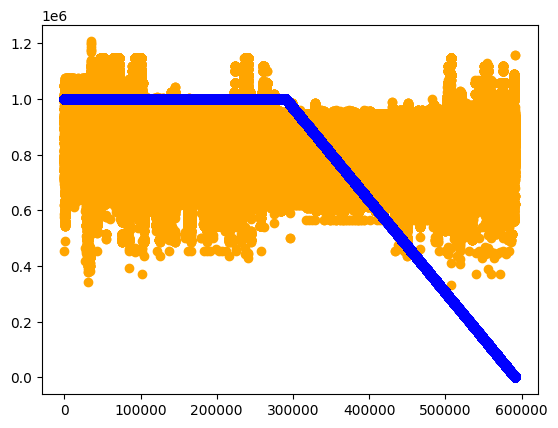

In [59]:
plt.figure()
plt.scatter(np.array(list(y_eval_.index)), LGBMreg.predict(X_eval_), c='orange')
plt.scatter(np.array(list(y_eval_.index)), np.array(list(y_eval_.values)), c='blue')


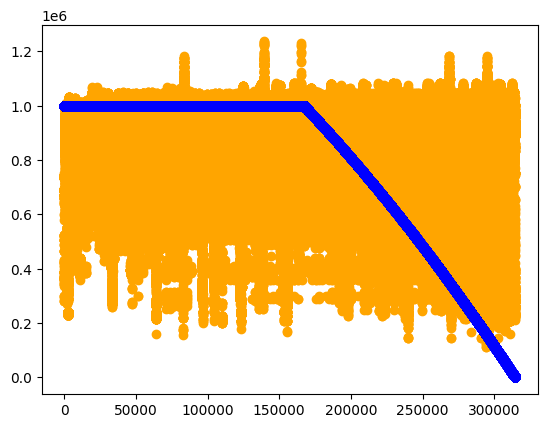

In [58]:
plt.figure()
plt.scatter(np.array(list(y_test_.index)), LGBMreg.predict(X_test_), c='orange')
plt.scatter(np.array(list(y_test_.index)), np.array(list(y_test_.values)), c='blue')


In [61]:
from tensorflow import keras
from tensorflow.keras import layers

2023-01-05 16:28:35.246914: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-05 16:28:35.711380: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [62]:
# define the model: 2 hidden layers each with 512 relu units
model1 = keras.Sequential([
    layers.Dense(units=512, input_shape=[
                 X_train_.shape[1]], activation='relu'),  # use relu
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    # binary classification, use sigmoid
    layers.Dense(units=1, activation='sigmoid')
])


2023-01-05 16:29:36.068222: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [63]:
# define optimizer and compile model
optimizer1 = keras.optimizers.SGD(learning_rate=0.1)
model1.compile(
    optimizer=optimizer1,
    loss="mean_squared_error",
    metrics='mean_squared_error'
)


In [65]:
# train the model and return loss values
history1 = model1.fit(X_train_, y_train_, validation_data=(
    X_eval_, y_eval_), epochs=10)
history_df1 = pd.DataFrame(history1.history)


Epoch 1/10
36967/36967 [==============================] - 248s 7ms/step - loss: 660804206592.0000 - mean_squared_error: 660804206592.0000 - val_loss: 660843331584.0000 - val_mean_squared_error: 660843331584.0000
Epoch 2/10
36967/36967 [==============================] - 216s 6ms/step - loss: 660805844992.0000 - mean_squared_error: 660805844992.0000 - val_loss: 660843331584.0000 - val_mean_squared_error: 660843331584.0000
Epoch 3/10
36967/36967 [==============================] - 213s 6ms/step - loss: 660806172672.0000 - mean_squared_error: 660806172672.0000 - val_loss: 660843331584.0000 - val_mean_squared_error: 660843331584.0000
Epoch 4/10
36967/36967 [==============================] - 218s 6ms/step - loss: 660804075520.0000 - mean_squared_error: 660804075520.0000 - val_loss: 660843331584.0000 - val_mean_squared_error: 660843331584.0000
Epoch 5/10
36967/36967 [==============================] - 221s 6ms/step - loss: 660804927488.0000 - mean_squared_error: 660804927488.0000 - val_loss: 66

In [ ]:
print(mean_squared_error(y_eval_, model1.predict(X_eval_), squared = False))


In [ ]:
print(mean_squared_error(y_test_, model1.predict(X_test_), squared = False))
